In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


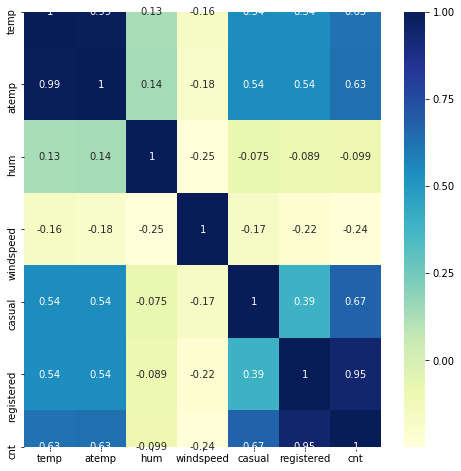

In [6]:
plt.figure(figsize=(8,8))
sns.heatmap(df[['temp','atemp','hum','windspeed','casual','registered','cnt']].corr(), annot=True, cmap="YlGnBu")
plt.show()

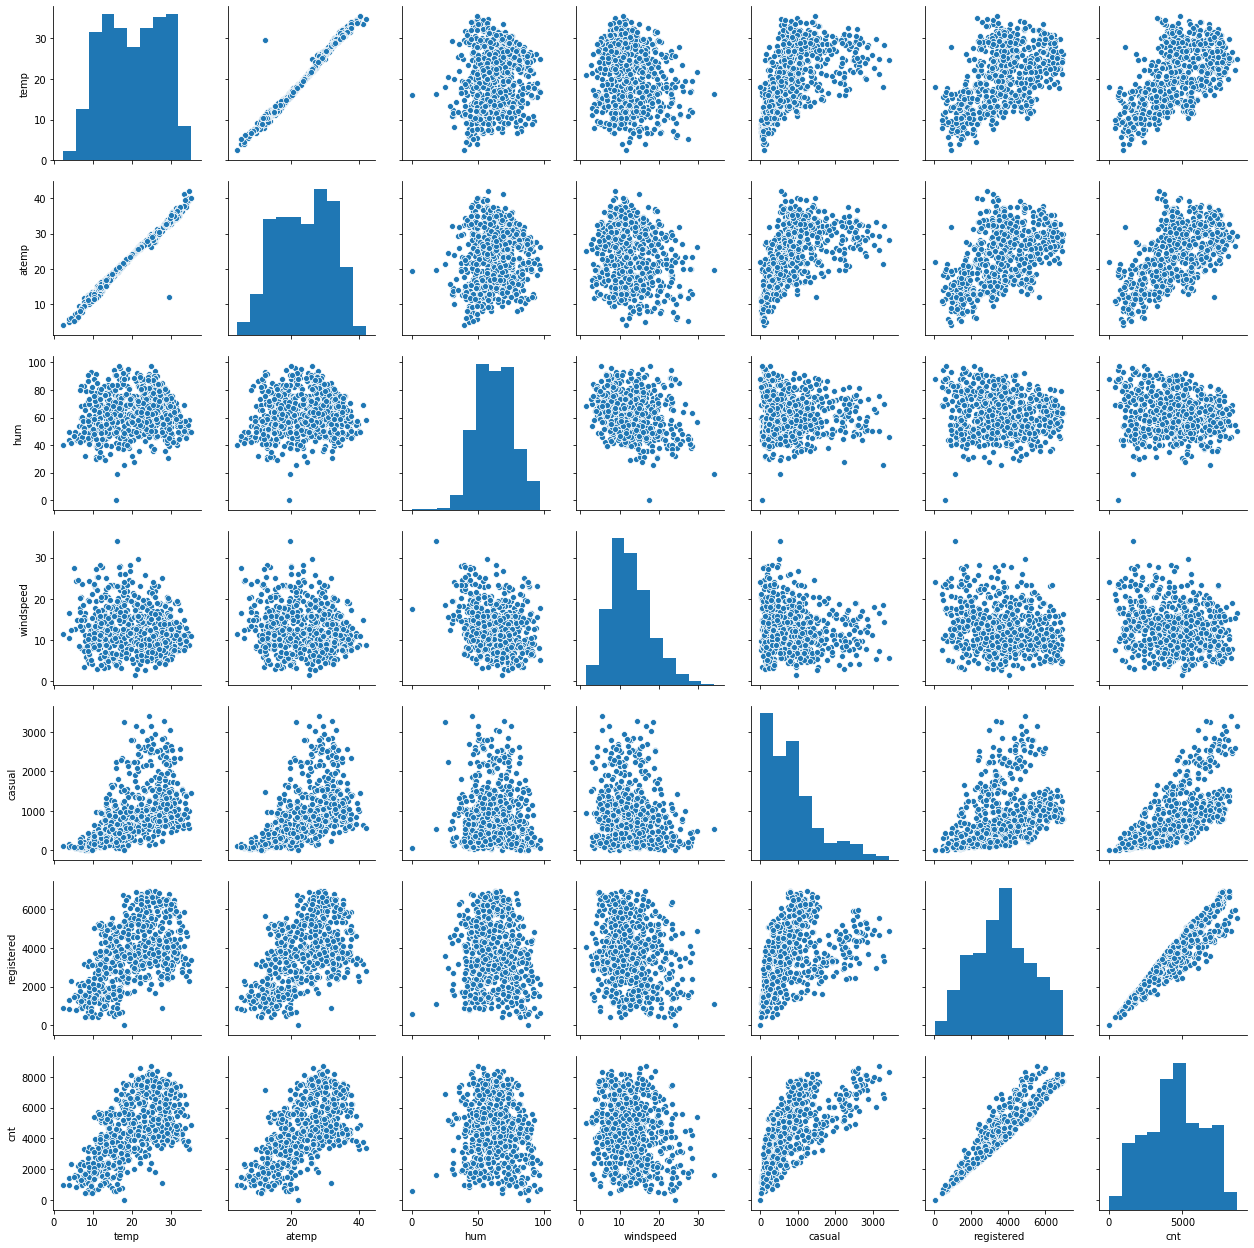

In [7]:
sns.pairplot(df[['temp','atemp','hum','windspeed','casual','registered','cnt']])
plt.show()

Mapping `season`, `yr`, `mnth`, `weekday` and `weathersit` to their meaning according to the data dictionary

In [8]:
seasons = {1:"spring", 2:"summer", 3:"fall", 4:"winter"}
df['season'] = df['season'].map(seasons)

df['yr'] = df['yr'].map({0:'2018', 1:'2019'})
df['yr'].value_counts()

weathers = {1:'Clear',2:'Misty',3:'Snowy',4:'Rainy'}
df['weathersit'] = df['weathersit'].map(weathers)

months = {1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',\
         10:'October',11:'November',12:'December'}
df['mnth'] = df['mnth'].map(months)

weekdays = {0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'}
df['weekday'] = df['weekday'].map(weekdays)

In [9]:
# drop the instance column as it is redundant
df = df.drop('instant',axis=1)

In [10]:
# dropping dteday as it is redundant also
df = df.drop('dteday', axis=1)

In [11]:
# cnt column is the sum of casual + registered columns
# so we will remove one of the columns casual or registered as they are redundant
df = df.drop(['casual'], axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered,cnt
0,spring,2018,January,0,Saturday,0,Misty,14.110847,18.18125,80.5833,10.749882,654,985
1,spring,2018,January,0,Sunday,0,Misty,14.902598,17.68695,69.6087,16.652113,670,801
2,spring,2018,January,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1229,1349
3,spring,2018,January,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1454,1562
4,spring,2018,January,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1518,1600


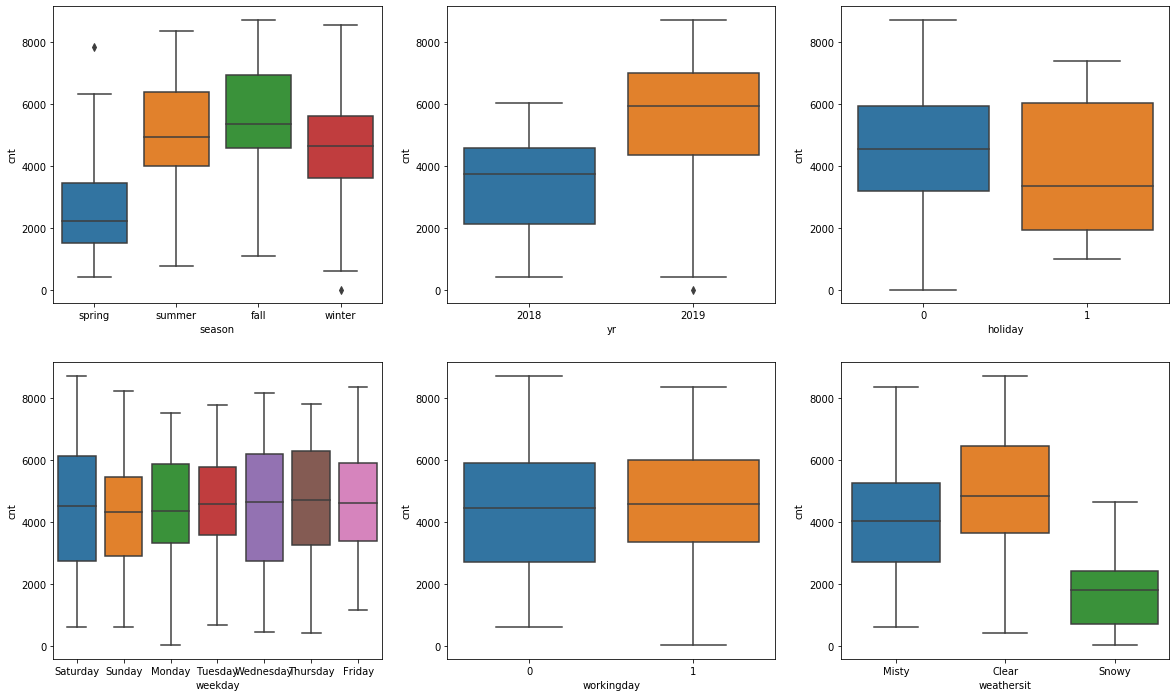

In [12]:
# visualizing through boxplot
plt.figure(figsize = (20,12))
plt.subplot(2,3,1)
sns.boxplot(x='season',y='cnt',data=df)

plt.subplot(2,3,2)
sns.boxplot(x='yr',y='cnt',data=df)

plt.subplot(2,3,3)
sns.boxplot(x='holiday',y='cnt',data=df)

plt.subplot(2,3,4)
sns.boxplot(x='weekday',y='cnt',data=df)

plt.subplot(2,3,5)
sns.boxplot(x='workingday',y='cnt',data=df)

plt.subplot(2,3,6)
sns.boxplot(x='weathersit',y='cnt',data=df)
plt.show()

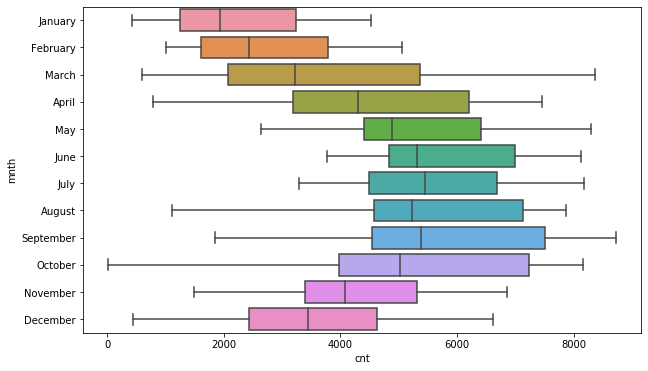

In [13]:
plt.figure(figsize = (10,6))
sns.boxplot(y='mnth',x='cnt',data=df)
plt.show()

### Introducing dummy variables

In [14]:
season_dummy = pd.get_dummies(df['season'], drop_first=True)
yr_dummy = pd.get_dummies(df['yr'], drop_first=True)
month_dummy = pd.get_dummies(df['mnth'], drop_first=True)
weekday_dummy = pd.get_dummies(df['weekday'], drop_first=True)
weather_dummy = pd.get_dummies(df['weathersit'], drop_first=True)
status = pd.concat([season_dummy,yr_dummy,month_dummy,weekday_dummy,weather_dummy], axis=1)
df = pd.concat([df,status], axis=1)
df = df.drop(['season','yr','mnth','weekday','weathersit'], axis=1)
df.head()

,holiday,workingday,temp,atemp,hum,windspeed,registered,cnt,spring,summer,winter,2019,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Misty,Snowy
0,0,0,14.110847,18.18125,80.5833,10.749882,654,985,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,0,0,14.902598,17.68695,69.6087,16.652113,670,801,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,1,8.050924,9.47025,43.7273,16.636703,1229,1349,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,1,8.200000,10.60610,59.0435,10.739832,1454,1562,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,1,9.305237,11.46350,43.6957,12.522300,1518,1600,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [15]:
df.shape

(730, 31)

## Splitting the dataset

In [16]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 31)
(220, 31)


In [17]:
df_train.head()

,holiday,workingday,temp,atemp,hum,windspeed,registered,cnt,spring,summer,winter,2019,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Misty,Snowy
576,0,1,29.246653,33.1448,70.4167,11.083475,6248,7216,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
426,0,0,16.980847,20.6746,62.1250,10.792293,3110,4066,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
728,0,0,10.489153,11.5850,48.3333,23.500518,1432,1796,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,0,0,15.443347,18.8752,48.9583,8.708325,3100,4220,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
111,0,1,13.803347,16.0977,72.9583,14.707907,1506,1683,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


## Rescaling the training dataset

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # instance of the MinMaxScaler

# numerical variables to scale:
num_vars = ['temp','atemp','hum','windspeed','registered','cnt']

# scaling the num vars of the training data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,holiday,workingday,temp,atemp,hum,windspeed,registered,cnt,spring,summer,winter,2019,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Misty,Snowy
576,0,1,0.815169,0.766351,0.725633,0.264686,0.899220,0.827658,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
426,0,0,0.442393,0.438975,0.640189,0.255342,0.446145,0.465255,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
728,0,0,0.245101,0.200348,0.498067,0.663106,0.203869,0.204096,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,0,0,0.395666,0.391735,0.504508,0.188475,0.444701,0.482973,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
111,0,1,0.345824,0.318819,0.751824,0.380981,0.214554,0.191095,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [19]:
df_train.describe()

,holiday,workingday,temp,atemp,hum,windspeed,registered,cnt,spring,summer,winter,2019,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Misty,Snowy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.523781,0.513499,0.243137,0.247059,0.247059,0.507843,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.345098,0.029412
std,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.227896,0.224421,0.429398,0.431725,0.431725,0.500429,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.353487,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.525123,0.518638,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.696073,0.684710,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Model Building

In [20]:
y_train = df_train.pop('cnt')
X_train = df_train

As our dataset has large no of predictors (30) so we will use **RFE** to eliminate non significant features (coarse tuning) and then we will tune the model manually

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

lm = LinearRegression()
lm.fit(X_train, y_train)

# Running RFE with output no of variables equal to 15
rfe = RFE(lm, 15)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=15, step=1, verbose=0)

In [22]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('holiday', False, 5),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('registered', True, 1),
 ('spring', False, 11),
 ('summer', True, 1),
 ('winter', True, 1),
 ('2019', False, 15),
 ('August', False, 4),
 ('December', True, 1),
 ('February', True, 1),
 ('January', True, 1),
 ('July', False, 3),
 ('June', False, 2),
 ('March', False, 13),
 ('May', False, 6),
 ('November', False, 16),
 ('October', True, 1),
 ('September', False, 14),
 ('Monday', False, 10),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 9),
 ('Tuesday', False, 8),
 ('Wednesday', False, 7),
 ('Misty', False, 12),
 ('Snowy', True, 1)]

In [23]:
# list of significant columns
cols = X_train.columns[rfe.support_]
cols

Index(['workingday', 'temp', 'atemp', 'hum', 'windspeed', 'registered',
       'summer', 'winter', 'December', 'February', 'January', 'October',
       'Saturday', 'Sunday', 'Snowy'],
      dtype='object')

In [24]:
# list of insignificant columns
X_train.columns[~rfe.support_]

Index(['holiday', 'spring', '2019', 'August', 'July', 'June', 'March', 'May',
       'November', 'September', 'Monday', 'Thursday', 'Tuesday', 'Wednesday',
       'Misty'],
      dtype='object')

In [25]:
# Creating dataset having only significant columns as per RFE
X_train_rfe = X_train[cols]

## Building the model using statsmodels for detailed statistics 
- Manually selecting the features from now on (Fine tuning)

In [26]:
import statsmodels.api as sm

In [27]:
# adding the constant to the X_train dataset otherwise it will fit the line through the origin by default
X_train_new = sm.add_constant(X_train_rfe)

# Checking the existing model statistics
lr = sm.OLS(y_train, X_train_new).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     1126.
Date:                Sun, 07 Mar 2021   Prob (F-statistic):               0.00
Time:                        11:23:21   Log-Likelihood:                 946.87
No. Observations:                 510   AIC:                            -1862.
Df Residuals:                     494   BIC:                            -1794.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0587      0.017      3.502      0.001       0.026       0.092
workingday    -0.0690      0.011     -6.201      0.000      -0.091      -0.047
temp           0.1245      0.056      2.236      0.026       0.015       0.234
atemp         -0.0379      0.058     -0.651      0.516      -0.152       0.076
hum           -0.0374      0.013     -2.773      0.006      -0.064      -0.011
windspeed     -0.0495      0.011     -4.398      0.000      -0.072      -0.027
registered     0.9250      0.011     83.278      0.000       0.903       0.947
summer         0.0195      0.005      4.032      0.000       0.010       0.029
winter        -0.0190      0.006     -2.929      0.004      -0.032      -0.006
December      -0.0221      0.007     -2.999      0.003      -0.037      -0.008
February      -0.0235      0.009     -2.692      0.007      -0.041      -0.006
January       -0.0222      0.009     -2.550      0.011      -0.039      -0.005
October        0.0276      0.008      3.560      0.000       0.012       0.043
Saturday       0.0471      0.012      4.063      0.000       0.024       0.070
Sunday         0.0405      0.012      3.483      0.001       0.018       0.063
Snowy         -0.0167      0.011     -1.522      0.129      -0.038       0.005
==============================================================================
Omnibus:                       82.375   Durbin-Watson:                   1.849
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.098
Skew:                           0.903   Prob(JB):                     2.33e-36
Kurtosis:                       5.111   Cond. No.                         82.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,363.65
2,atemp,361.01
3,hum,21.41
0,workingday,19.28
5,registered,13.41
12,Saturday,4.73
4,windspeed,4.68
13,Sunday,4.45
7,winter,3.40
10,January,1.96


Both `temp` and `atemp` have very high VIF. `atemp` has the highest p-value among all other variables, so giving priority to p-value, we will remove the `atemp` variable

In [29]:
X_train_rfe2 = X_train_rfe.drop('atemp', axis=1)

In [30]:
X_train_new2 = sm.add_constant(X_train_rfe2)

# Checking the existing model statistics
lr2 = sm.OLS(y_train, X_train_new2).fit()
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     1208.
Date:                Sun, 07 Mar 2021   Prob (F-statistic):               0.00
Time:                        11:23:21   Log-Likelihood:                 946.65
No. Observations:                 510   AIC:                            -1863.
Df Residuals:                     495   BIC:                            -1800.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0584      0.017      3.489      0.001       0.026       0.091
workingday    -0.0692      0.011     -6.228      0.000      -0.091      -0.047
temp           0.0894      0.014      6.569      0.000       0.063       0.116
hum           -0.0378      0.013     -2.805      0.005      -0.064      -0.011
windspeed     -0.0482      0.011     -4.355      0.000      -0.070      -0.026
registered     0.9250      0.011     83.326      0.000       0.903       0.947
summer         0.0190      0.005      3.982      0.000       0.010       0.028
winter        -0.0194      0.006     -3.003      0.003      -0.032      -0.007
December      -0.0222      0.007     -3.016      0.003      -0.037      -0.008
February      -0.0236      0.009     -2.714      0.007      -0.041      -0.007
January       -0.0222      0.009     -2.551      0.011      -0.039      -0.005
October        0.0274      0.008      3.540      0.000       0.012       0.043
Saturday       0.0468      0.012      4.047      0.000       0.024       0.070
Sunday         0.0403      0.012      3.465      0.001       0.017       0.063
Snowy         -0.0162      0.011     -1.482      0.139      -0.038       0.005
==============================================================================
Omnibus:                       81.973   Durbin-Watson:                   1.850
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.319
Skew:                           0.902   Prob(JB):                     5.66e-36
Kurtosis:                       5.094   Cond. No.                         23.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,21.32
1,temp,19.79
0,workingday,19.21
4,registered,13.41
11,Saturday,4.71
3,windspeed,4.50
12,Sunday,4.43
6,winter,3.37
9,January,1.96
5,summer,1.91


All vars have p-values less that 0.05 but `hum` has VIF = 21.32 so we have to remove it.

In [32]:
X_train_rfe3 = X_train_rfe2.drop('hum', axis=1)

X_train_new3 = sm.add_constant(X_train_rfe3)

# Checking the existing model statistics
lr3 = sm.OLS(y_train, X_train_new3).fit()
print(lr3.summary())

vif = pd.DataFrame()
vif['Features'] = X_train_rfe3.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe3.values, i) for i in range(X_train_rfe3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     1282.
Date:                Sun, 07 Mar 2021   Prob (F-statistic):               0.00
Time:                        11:23:21   Log-Likelihood:                 942.63
No. Observations:                 510   AIC:                            -1857.
Df Residuals:                     496   BIC:                            -1798.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0356      0.015      2.416      0.0

Removing `temp`

In [33]:
X_train_rfe4 = X_train_rfe3.drop('temp', axis=1)

X_train_new4 = sm.add_constant(X_train_rfe4)

# Checking the existing model statistics
lr4 = sm.OLS(y_train, X_train_new4).fit()
print(lr4.summary())

vif = pd.DataFrame()
vif['Features'] = X_train_rfe4.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe4.values, i) for i in range(X_train_rfe4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     1295.
Date:                Sun, 07 Mar 2021   Prob (F-statistic):               0.00
Time:                        11:23:21   Log-Likelihood:                 924.76
No. Observations:                 510   AIC:                            -1824.
Df Residuals:                     497   BIC:                            -1768.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0808      0.013      6.169      0.0

Removing `snowy` as it has highest p-value

In [34]:
X_train_rfe5 = X_train_rfe4.drop('Snowy', axis=1)

X_train_new5 = sm.add_constant(X_train_rfe5)

# Checking the existing model statistics
lr5 = sm.OLS(y_train, X_train_new5).fit()
print(lr5.summary())

vif = pd.DataFrame()
vif['Features'] = X_train_rfe5.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe5.values, i) for i in range(X_train_rfe5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     1409.
Date:                Sun, 07 Mar 2021   Prob (F-statistic):               0.00
Time:                        11:23:21   Log-Likelihood:                 923.69
No. Observations:                 510   AIC:                            -1823.
Df Residuals:                     498   BIC:                            -1773.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0793      0.013      6.065      0.0

Removing `workingday`

In [35]:
X_train_rfe6 = X_train_rfe5.drop('workingday', axis=1)

X_train_new6 = sm.add_constant(X_train_rfe6)

# Checking the existing model statistics
lr6 = sm.OLS(y_train, X_train_new6).fit()
print(lr6.summary())

vif = pd.DataFrame()
vif['Features'] = X_train_rfe6.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe6.values, i) for i in range(X_train_rfe6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     1423.
Date:                Sun, 07 Mar 2021   Prob (F-statistic):               0.00
Time:                        11:23:21   Log-Likelihood:                 902.02
No. Observations:                 510   AIC:                            -1782.
Df Residuals:                     499   BIC:                            -1735.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0110      0.008      1.307      0.1

Removing `summer` as it has p-value around 0.1

In [36]:
X_train_rfe7 = X_train_rfe6.drop('summer', axis=1)

X_train_new7 = sm.add_constant(X_train_rfe7)

# Checking the existing model statistics
lr7 = sm.OLS(y_train, X_train_new7).fit()
print(lr7.summary())

vif = pd.DataFrame()
vif['Features'] = X_train_rfe7.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe7.values, i) for i in range(X_train_rfe7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     1575.
Date:                Sun, 07 Mar 2021   Prob (F-statistic):               0.00
Time:                        11:23:21   Log-Likelihood:                 900.63
No. Observations:                 510   AIC:                            -1781.
Df Residuals:                     500   BIC:                            -1739.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0141      0.008      1.712      0.0

#### Our model is ready having adj R squared value as 0.965 and with 9 significant predictors as shown above

## Residual Analysis on train data

In [37]:
y_train_pred = lr7.predict(X_train_new7)

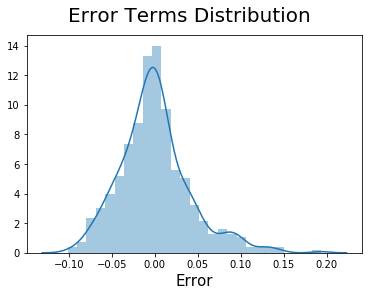

In [38]:
fig = plt.figure()
sns.distplot(y_train - y_train_pred)
plt.xlabel('Error', fontsize=15)
fig.suptitle("Error Terms Distribution", fontsize=20)
plt.show()

*Error terms are normally distributed with mean = 0*

## Making Predictions

### Transforming the numerical variables of test set

In [39]:
# columns of the final model
X_train_rfe7.columns

Index(['windspeed', 'registered', 'winter', 'December', 'February', 'January',
       'October', 'Saturday', 'Sunday'],
      dtype='object')

In [40]:
# transforming the test dataset
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.describe()

,holiday,workingday,temp,atemp,hum,windspeed,registered,cnt,spring,summer,winter,2019,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Misty,Snowy
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.529076,0.522154,0.254545,0.263636,0.236364,0.481818,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.318182,0.027273
std,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219300,0.219163,0.436599,0.441609,0.425817,0.500809,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.466833,0.163248
min,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.059486,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.359190,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.527577,0.524678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.667088,0.677750,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.985273,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
y_test = df_test.pop('cnt')

# dropping insignificant columns in test set
X_test = df_test[X_train_rfe7.columns]

In [42]:
X_test.head()

,windspeed,registered,winter,December,February,January,October,Saturday,Sunday
184,0.084219,0.427086,0,0,0,0,0,0,0
535,0.153728,0.767976,0,0,0,0,0,0,0
299,0.334206,0.346376,1,0,0,0,1,0,0
221,0.339570,0.559630,0,0,0,0,0,0,0
152,0.537414,0.608143,0,0,0,0,0,0,0


In [43]:
# adding constant in X_test
X_test_new = sm.add_constant(X_test)

In [44]:
# using model lr7 to make predictions
y_pred = lr7.predict(X_test_new)

## Model Evaluation

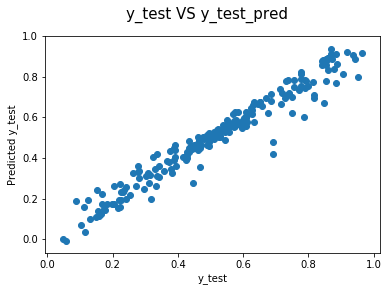

In [46]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test VS y_test_pred', fontsize=15)
plt.xlabel('y_test',fontsize=10)
plt.ylabel('Predicted y_test',fontsize=10)
plt.show()

## Calculation of R-squared of test dataset

In [48]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9449384543367056

**Hence our model predicts with the accuracy of 94.5%**

In [49]:
# based on final model (lr_2) finding top 3 features 
lm2 = LinearRegression()
lm2.fit(X_train_rfe7, y_train)

rfe = RFE(lm2, 3)
rfe.fit(X_train_rfe7, y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=3, step=1, verbose=0)

In [51]:
list(zip(X_train_rfe7.columns, rfe.support_, rfe.ranking_))

[('windspeed', False, 5),
 ('registered', True, 1),
 ('winter', False, 6),
 ('December', False, 2),
 ('February', False, 4),
 ('January', False, 3),
 ('October', False, 7),
 ('Saturday', True, 1),
 ('Sunday', True, 1)]